<a href="https://colab.research.google.com/github/Hamza1407/AnalyseTemp/blob/main/Clustering%20Heures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering des périodes horaires sur les données 2022

Hamza BELABBES

Ce notebook a pour objectif de pouvoir determiner des clusters horaires selon la consommation de tous les clients.

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings(action="ignore")

Les données ont été nettoyées et reorganisées de façon à avoir un dataset sous la forme suivante :

In [2]:
df=pd.read_csv('/content/Join.csv')
df.head()

,Heure,Jour,Mois,Année,Indus4-1,College2-1,College2-4,Indus4-2,College2-3,College2-2,...,College1-7,Indus8,College3,Indus1,AMTE4,Private5,College1-6,AMTE3,College1-1,Private2
0,0,1,1,2022,6000.0,884.0,139.0,6000.0,14166.666667,179.0,...,26833.333333,2000.000000,20500.000000,1583.333333,5500.0,511.0,145.0,65500.0,90.0,1685.0
1,0,1,2,2022,9500.0,210.0,230.0,10000.0,14500.000000,223.0,...,29666.666667,2000.000000,26500.000000,2083.333333,6000.0,1882.0,151.0,102500.0,90.0,2072.0
2,0,1,3,2022,20000.0,173.0,212.0,18500.0,12333.333333,193.0,...,30166.666667,2333.333333,24833.333333,2333.333333,5000.0,219.0,145.0,99000.0,90.0,1718.0
3,0,1,4,2022,34000.0,116.0,465.0,34000.0,15166.666667,209.0,...,27833.333333,2333.333333,26833.333333,2000.000000,5000.0,166.0,142.0,120000.0,93.0,1720.0
4,0,1,5,2022,27000.0,85.0,328.0,26000.0,11833.333333,197.0,...,28000.000000,1666.666667,20333.333333,1666.666667,2000.0,339.0,94.0,77500.0,93.0,216.0


On initialise notre df X ne contiendra que les valeurs des mesures de puissance et on le standarize.
Le modèle de clustering des plus proches voisins utilise la notion de distance eucliedienne, d'où l'importance de la standarization.

In [3]:
X = df.drop(columns=['Heure','Jour','Mois','Année'])
scaler = MinMaxScaler()

X_standarized= df.drop(columns=['Heure','Jour','Mois','Année'])



for x in X_standarized.columns:
    col_to_normalize=X_standarized[x]
    col_to_normalize = col_to_normalize.values.reshape(-1, 1)

    col_to_normalize = scaler.fit_transform(col_to_normalize)
    X_standarized[x] = col_to_normalize

Le modèle des plus proches voisins nous impose de choisir le nombre de clusters. Pour cela on utilise la méthode du coude de Jambu.

In [4]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X_standarized)
    cost.append(kmean.inertia_)

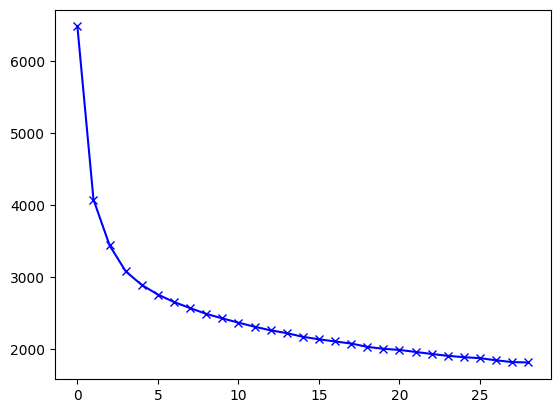

In [5]:
plt.plot(cost, 'bx-')

L'inertie commence à décroitre plus lentement à partir de 3 ou 4 clusters.
On va dans un premier temps imposer un nombre de clusters de 3.

In [6]:
kmean= KMeans(3)
kmean.fit(X_standarized)
labels=kmean.labels_

In [7]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Heure,Jour,Mois,Année,Indus4-1,College2-1,College2-4,Indus4-2,College2-3,College2-2,...,Indus8,College3,Indus1,AMTE4,Private5,College1-6,AMTE3,College1-1,Private2,cluster
0,0,1,1,2022,6000.0,884.0,139.0,6000.0,14166.666667,179.0,...,2000.000000,20500.000000,1583.333333,5500.0,511.0,145.0,65500.0,90.0,1685.0,0
1,0,1,2,2022,9500.0,210.0,230.0,10000.0,14500.000000,223.0,...,2000.000000,26500.000000,2083.333333,6000.0,1882.0,151.0,102500.0,90.0,2072.0,1
2,0,1,3,2022,20000.0,173.0,212.0,18500.0,12333.333333,193.0,...,2333.333333,24833.333333,2333.333333,5000.0,219.0,145.0,99000.0,90.0,1718.0,1
3,0,1,4,2022,34000.0,116.0,465.0,34000.0,15166.666667,209.0,...,2333.333333,26833.333333,2000.000000,5000.0,166.0,142.0,120000.0,93.0,1720.0,1
4,0,1,5,2022,27000.0,85.0,328.0,26000.0,11833.333333,197.0,...,1666.666667,20333.333333,1666.666667,2000.0,339.0,94.0,77500.0,93.0,216.0,0


Affichons la répartition des valeurs de chaque colonne en fonction des clusters et essayons de dégager de l'information utilie concernant ces derniers.

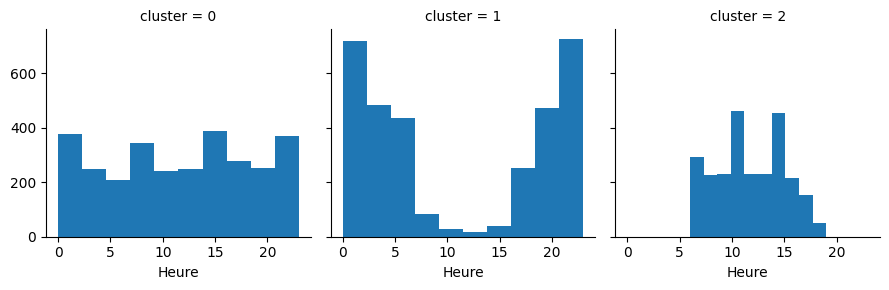

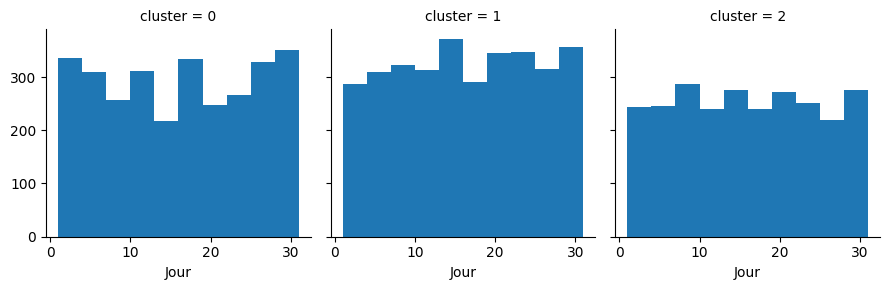

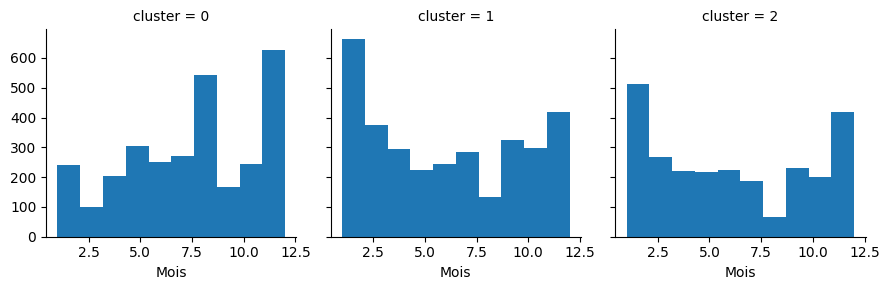

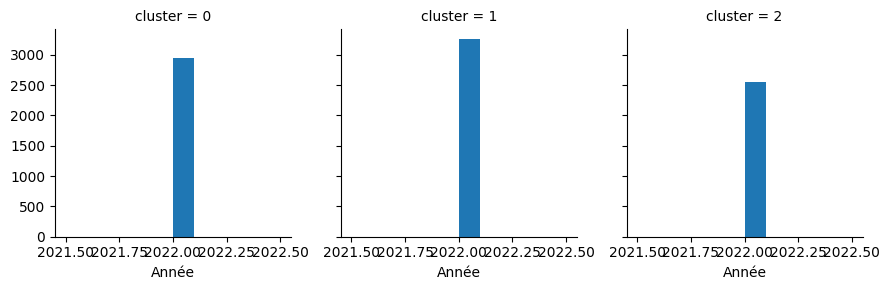

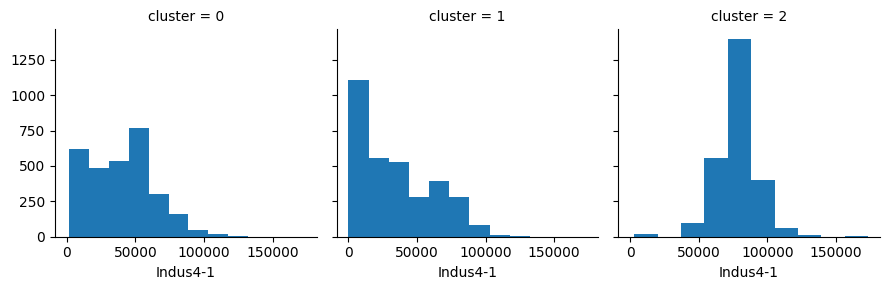

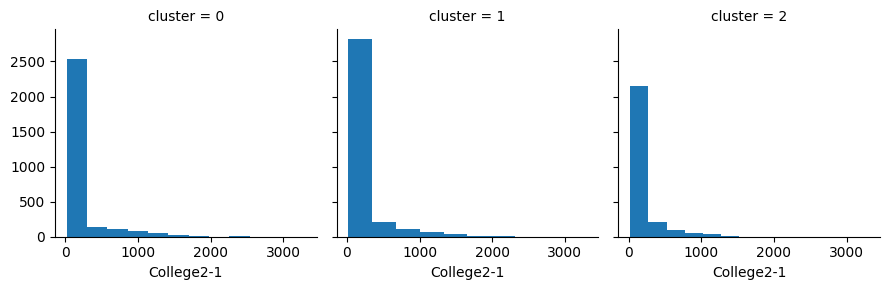

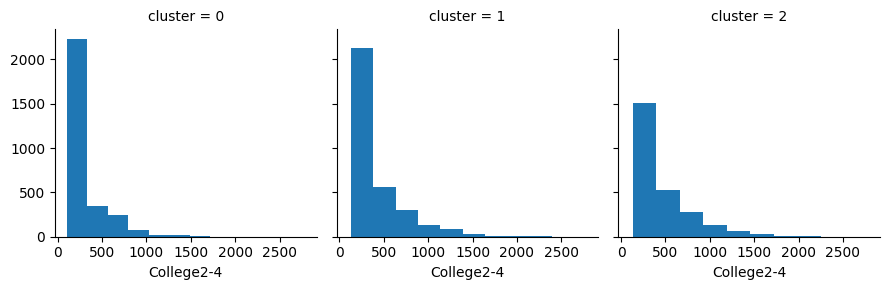

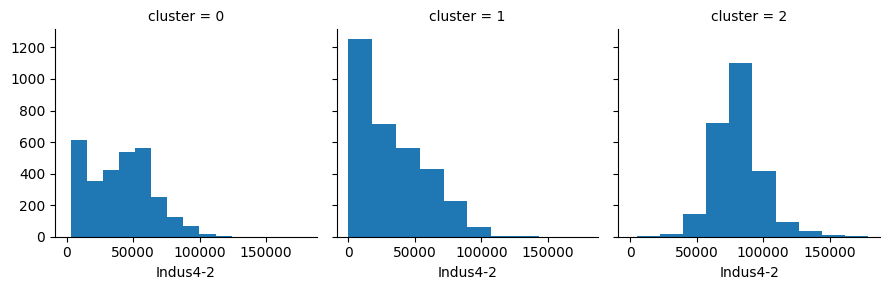

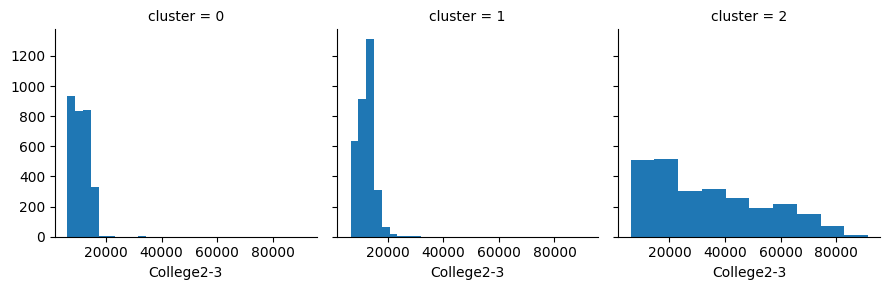

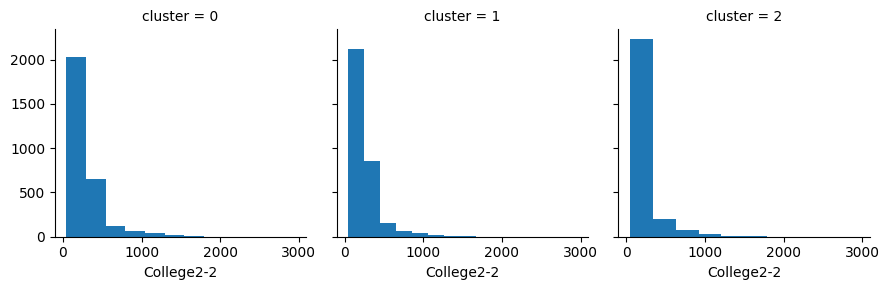

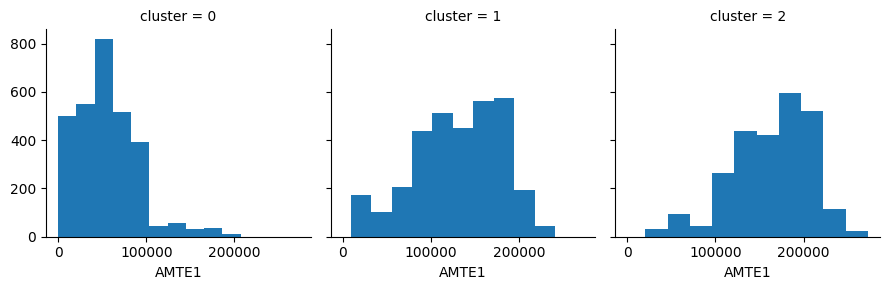

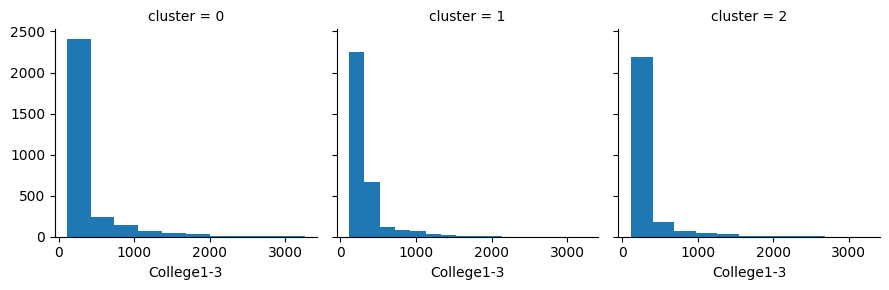

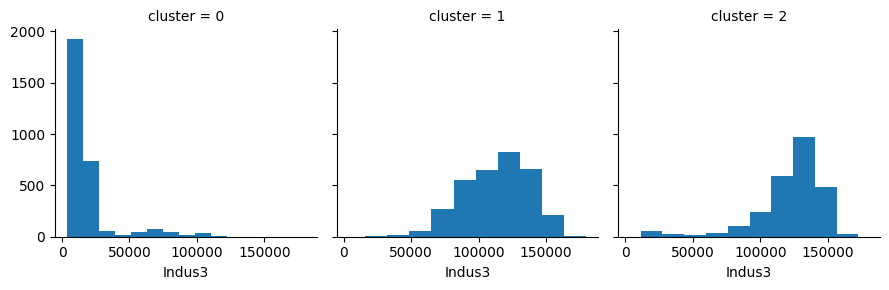

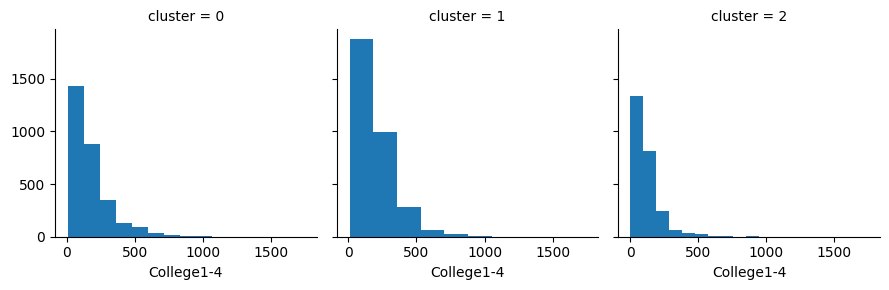

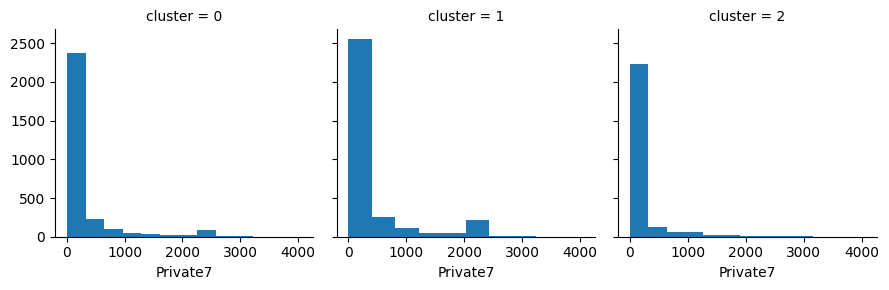

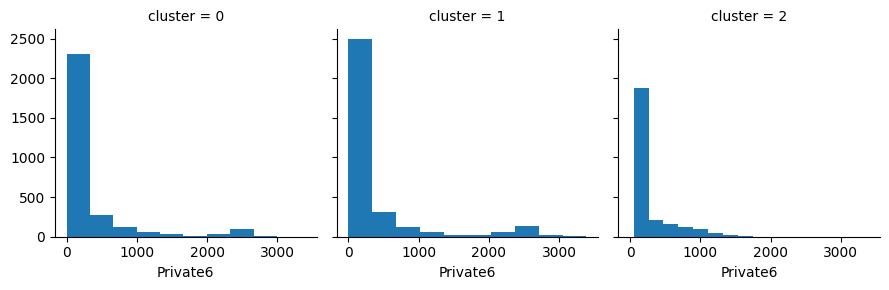

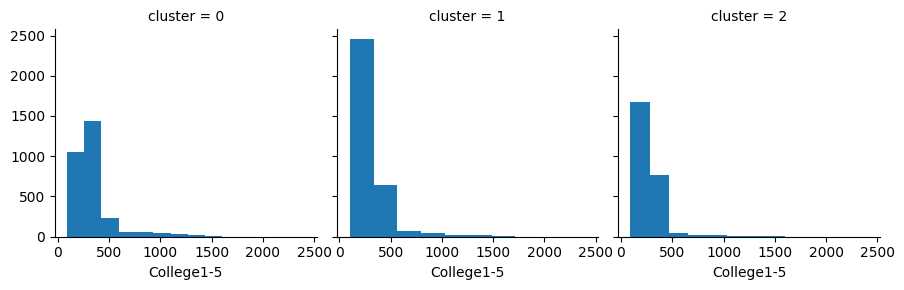

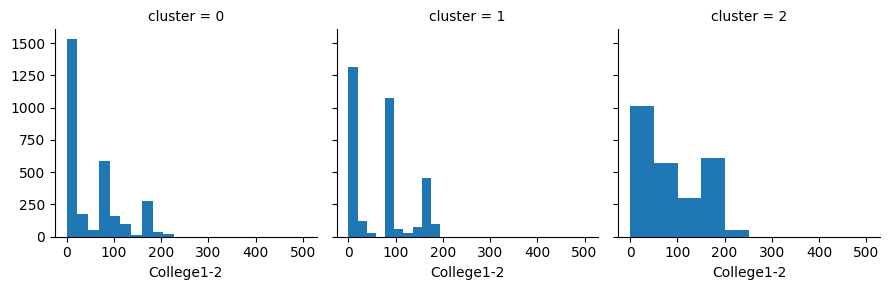

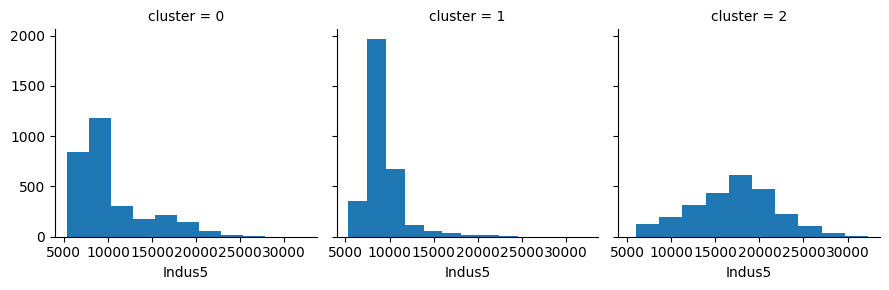

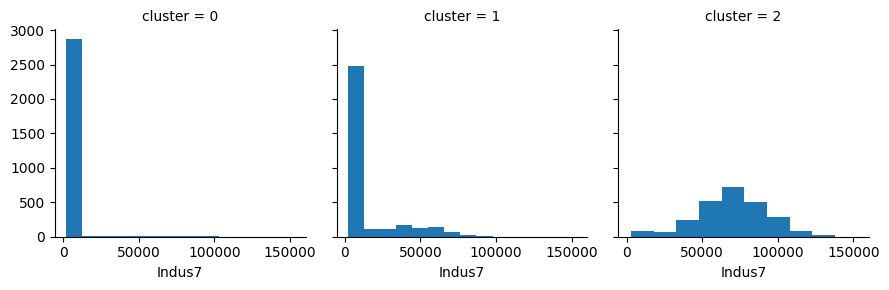

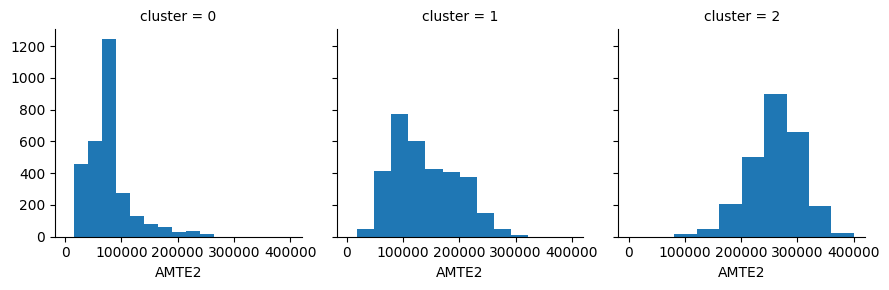

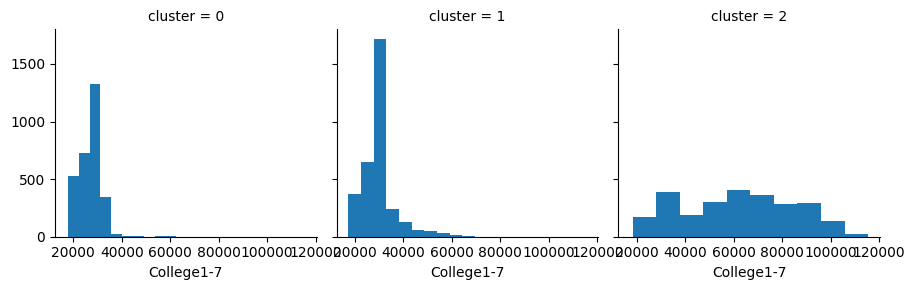

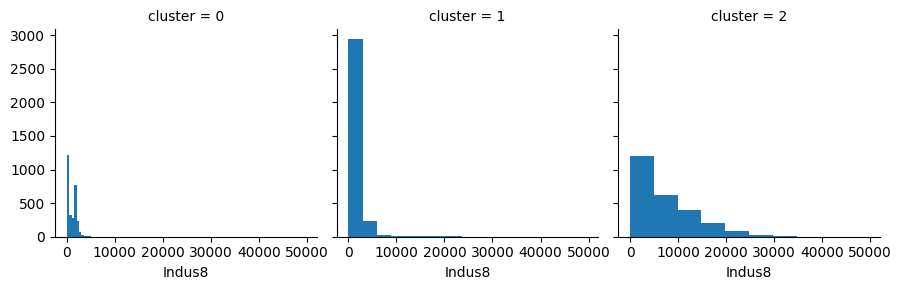

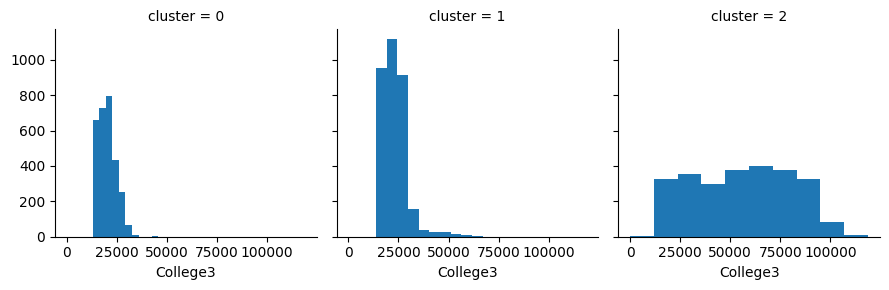

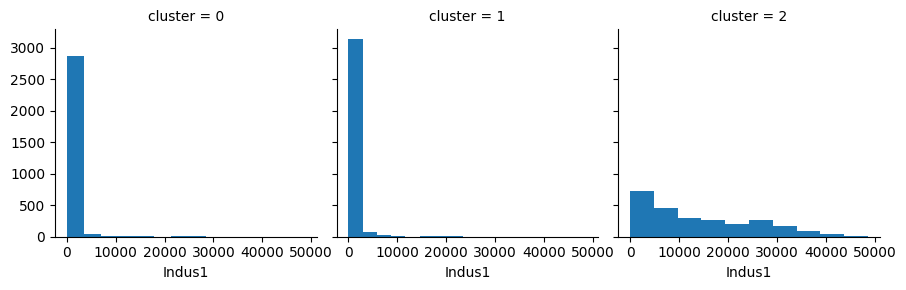

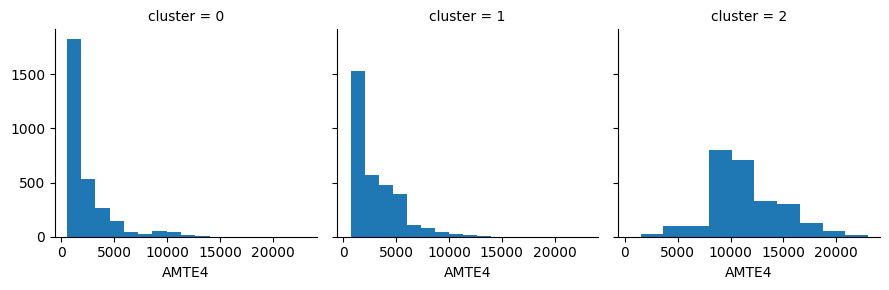

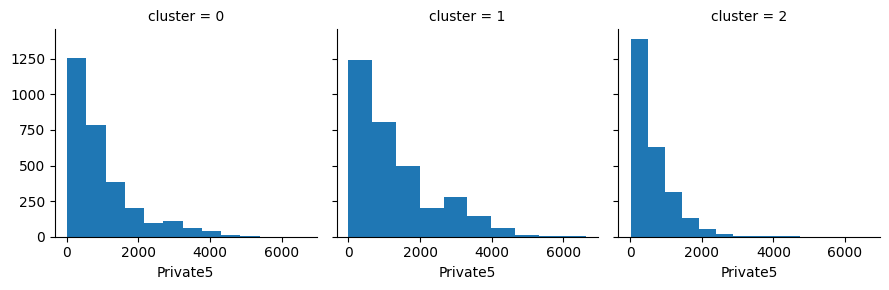

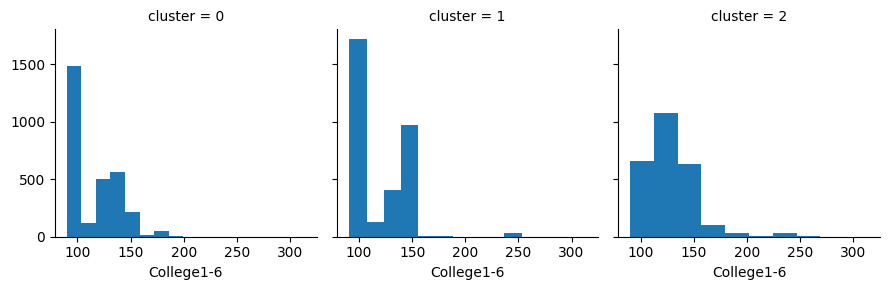

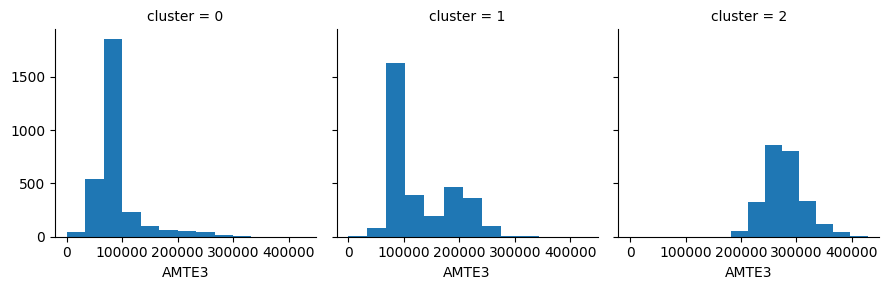

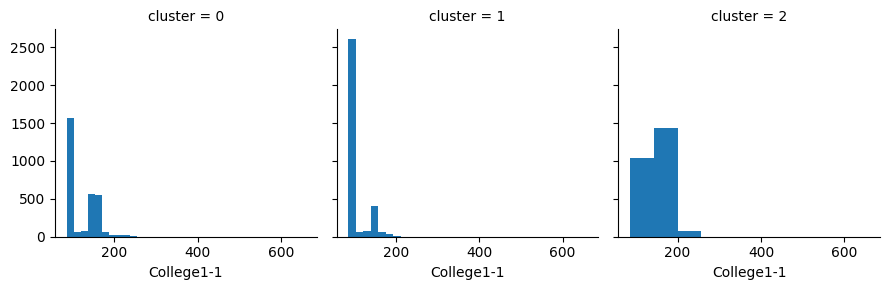

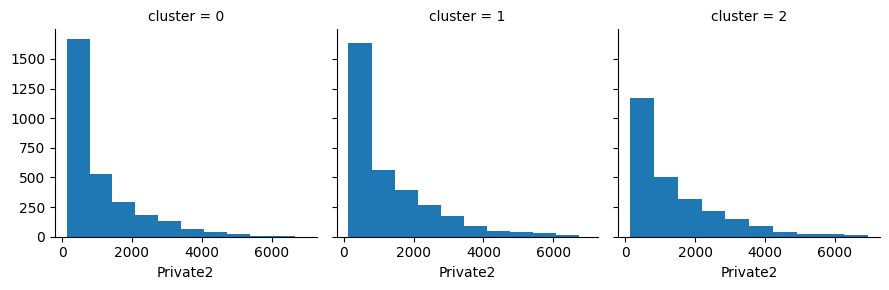

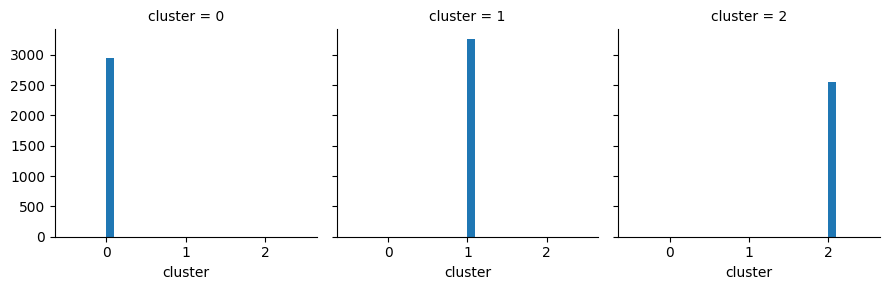

In [8]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

On affiche ensuite la moyenne de chaque colonnes de chaque client pour chaque cluster.

In [9]:
grouped_data = clusters.groupby('cluster')

# Obtenez la liste des noms de colonnes (mesures) en excluant celles que vous ne voulez pas afficher
excluded_columns = ['Heure', 'Jour', 'Année', 'cluster', 'Mois']
columns = [col for col in clusters.columns if col not in excluded_columns]

# Boucle pour parcourir toutes les colonnes
for column in columns:
    print(f"Colonne : {column}")
    # Boucle pour calculer et afficher la moyenne de chaque colonne pour chaque cluster
    for cluster, cluster_data in grouped_data:
        column_mean = cluster_data[column].mean()
        print(f"La moyenne de la colonne {column} pour le cluster {cluster} est de {column_mean:.2f}")

Colonne : Indus4-1
La moyenne de la colonne Indus4-1 pour le cluster 0 est de 39630.92
La moyenne de la colonne Indus4-1 pour le cluster 1 est de 34376.42
La moyenne de la colonne Indus4-1 pour le cluster 2 est de 77978.51
Colonne : College2-1
La moyenne de la colonne College2-1 pour le cluster 0 est de 206.96
La moyenne de la colonne College2-1 pour le cluster 1 est de 216.80
La moyenne de la colonne College2-1 pour le cluster 2 est de 196.89
Colonne : College2-4
La moyenne de la colonne College2-4 pour le cluster 0 est de 300.96
La moyenne de la colonne College2-4 pour le cluster 1 est de 388.55
La moyenne de la colonne College2-4 pour le cluster 2 est de 431.15
Colonne : Indus4-2
La moyenne de la colonne Indus4-2 pour le cluster 0 est de 39994.67
La moyenne de la colonne Indus4-2 pour le cluster 1 est de 32726.44
La moyenne de la colonne Indus4-2 pour le cluster 2 est de 81339.29
Colonne : College2-3
La moyenne de la colonne College2-3 pour le cluster 0 est de 10748.50
La moyenne de

Remarques:

- Le cluster 1 s'étale sur toutes les plages horaires en journée (entre 6h et 17h).

- Le cluster 2 s'étale sur les heures en dehors des horaires du cluster 1 (entre 18h et 5h).

- Les moyennes de College2-1, Private2, College1-1, College1-6, College1-2, College1-5, Private6, Private7, College1-4, College1-3, College2-2 et College2-4 ne varient pas ou très faiblement entre les clusters et ne contribue pas de manière significative à la séparation des clusters.


On peut faire sauter ces lignes et réaficher les moyennes pour chacun des clients restants.

In [10]:
means = clusters.groupby('cluster').mean()

means=means.drop(['Heure','Jour','Mois','Année','College2-1', 'Private2', 'College1-1', 'College1-6', 'College1-2', 'College1-5', 'Private6', 'Private7', 'College1-4', 'College1-3', 'College2-2','College2-4'],axis=1)
# Transposez le DataFrame pour avoir les clusters en colonnes
means = means.T

# Affichez les moyennes
print(means)

cluster                0              1              2
Indus4-1    39630.924171   34376.420018   77978.512559
Indus4-2    39994.668246   32726.435370   81339.285714
College2-3  10748.504683   12224.158300   34150.346775
AMTE1       55444.735951  131266.579675  163396.683673
Indus3      17299.974611  113455.122301  122036.204867
Indus5      10338.538140    9218.350220   17093.439299
Indus7       5203.424735   14436.853956   70141.777865
AMTE2       77938.473257  138919.327602  260012.460754
College1-7  27071.781201   29782.980248   62000.850340
Indus8       1025.657301    2103.269164    7105.275641
College3    20256.022907   22954.661754   55885.105965
Indus1       1886.693184    2085.636066   14154.369440
AMTE4        2324.306026    3070.770648   11398.645997
Private5      992.645565    1292.650292     637.755887
AMTE3       89126.692620  129593.636475  278698.842818


On pourra afficher la matrice de chaleur pour facilement lire ces informations. Mais il faudra re-standarizer les donner.

In [11]:
scaler22 = MinMaxScaler()

means=means.T
for colonne in means.columns:
    means[colonne] = scaler22.fit_transform(means[colonne].values.reshape(-1, 1))


In [12]:
means

,Indus4-1,Indus4-2,College2-3,AMTE1,Indus3,Indus5,Indus7,AMTE2,College1-7,Indus8,College3,Indus1,AMTE4,Private5,AMTE3
cluster,,,,,,,,,,,,,,,
0,0.12051,0.149513,0.000000,0.000000,0.00000,0.142244,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.541904,0.000000
1,0.00000,0.000000,0.063057,0.702367,0.91807,0.000000,0.142188,0.334923,0.07762,0.17725,0.075743,0.016217,0.082261,1.000000,0.213465
2,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000


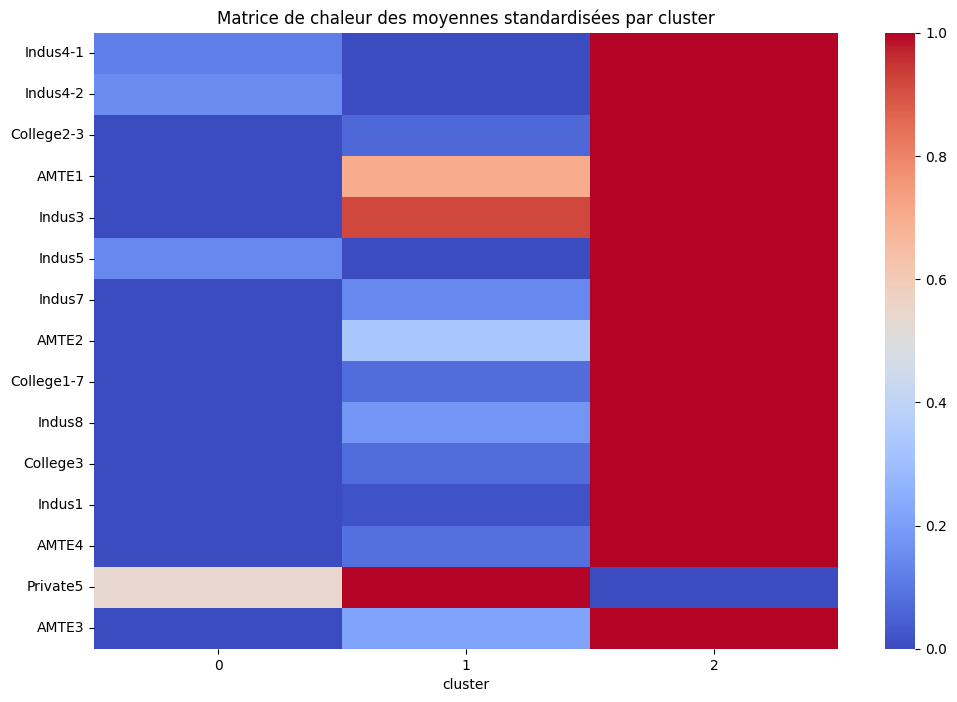

In [13]:
means=means.T
# Créez une matrice de chaleur
plt.figure(figsize=(12, 8))
sns.heatmap(means, annot=False, cmap='coolwarm')
plt.title('Matrice de chaleur des moyennes standardisées par cluster')
plt.show()